Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import datetime as dt
import glob

%matplotlib inline


In [2]:
filenames = !ls precios/
def leer_precios(filename): #define una funcion que lee los precios
    for k in range(5): #busca las primeras 10 lineas del archivo
        df = pd.read_excel(filename,
                           skiprows = k, #no cuente las filas
                           usecols = list(range(25))) #vaya a las 24 horas
        if df.iloc[0,0] == 'Fecha':
            df = pd.read_excel(filename,
                               skiprows = k+1,
                               usecols = list(range(25)))
            break
        
    return(df)



In [3]:

dfs =[] #Crea dataframe vacio para depositar los archivos
for filename in filenames:
    dfs.append(leer_precios("precios/"+filename))

In [8]:

dfs =[] #Crea dataframe vacio para depositar los archivos
for filename in filenames:
    dfs.append(leer_precios("precios/"+filename))

In [9]:
dfs = pd.concat(dfs)
dfs1=pd.melt(dfs,id_vars='Fecha') #convierte las horas en columnas por filas
dfs1.columns

Index(['Fecha', 'variable', 'value'], dtype='object')

In [10]:
#Cambiar nombre columna
dfs1=dfs1.rename(columns = {'variable':'Hora'})
dfs1=dfs1.rename(columns = {'value':'Precio'})

**2.--** Compute e imprima el número de registros con datos faltantes.

In [11]:
#Contar valores NAN
dfs1.isnull().sum().sum()

454

**3.--** Compute e imprima el número de registros duplicados.

In [12]:
#Registros duplicados
dfunique = dfs1.copy()
dfunique = len(dfunique.drop_duplicates().index)
duplicados =  len(dfs1.index) - dfunique
duplicados

1951

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [13]:
dfunique = dfs1.copy()
dfunique = (dfunique.drop_duplicates())
dfunique = (dfunique.dropna()   )            
len(dfunique.index)


199819

**5.--** Compute y grafique el precio primedio diario.

Text(0.5, 0, 'Día')

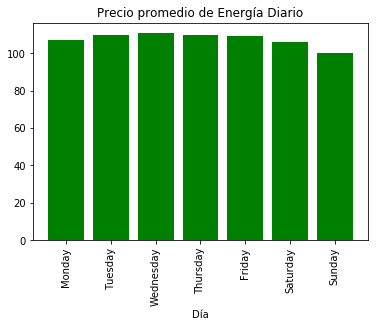

In [14]:
dfdia = dfunique.copy()
dfdia['Fecha'] = pd.to_datetime(dfdia['Fecha']) #Convierte en Fecha
dfdia['Dia'] =  dfdia[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)#Extrae el dia 
dfdia = dfdia.groupby('Dia').agg({'Precio': np.mean}) #Agrega la media por dia
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] #Lista ordenada de los dias
sorterIndex = dict(zip(sorter,range(len(sorter)))) #Crea un diccionario donde a cada día le asigna su posicion
dfdia.reset_index(inplace=True) #agrega elindice como columna
dfdia['DayRank'] = dfdia['Dia'].map(sorterIndex) #Crea indice con los dias ordenados
dfdiasorted = (dfdia.sort_values('DayRank'))
plt.bar(range(7), dfdiasorted['Precio'], color='green')
plt.xticks(range(7), list(dfdiasorted['Dia']), rotation='vertical')
plt.title('Precio promedio de Energía Diario')
plt.xlabel('Día')

**6.--** Compute y grafique el precio máximo por mes.

Text(0.5, 0, 'Mes')

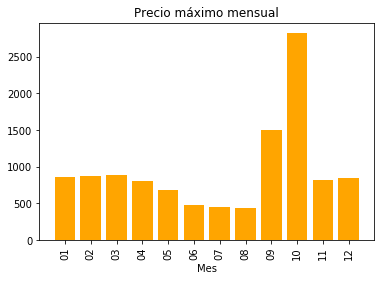

In [15]:
dfmes = dfunique.copy()
dfmes['Fecha'] = pd.to_datetime(dfmes['Fecha']) #Convierte en Fecha
dfmes['Mes'] =  dfmes[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%m'), axis=1)#Extrae el mes
dfmes = dfmes.groupby('Mes').agg({'Precio': np.max}) #Agrega el máximo por mes
plt.bar(range(12), dfmes['Precio'], color='orange')
plt.xticks(range(12), list((dfmes.index)), rotation='vertical')
plt.title('Precio máximo mensual')
plt.xlabel('Mes')

**7.--** Compute y grafique el precio mínimo mensual.

Text(0.5, 0, 'Mes')

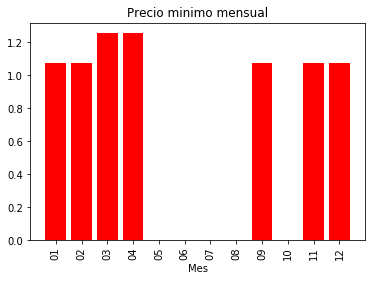

In [16]:
dfmesmin = dfunique.copy()
dfmesmin['Fecha'] = pd.to_datetime(dfmesmin['Fecha']) #Convierte en Fecha
dfmesmin['Mes'] =  dfmesmin[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%m'), axis=1)#Extrae el mes
dfmesmin = dfmesmin.groupby('Mes').agg({'Precio': np.min}) #Agrega el minimo por mes
plt.bar(range(12), dfmesmin['Precio'], color='red')
plt.xticks(range(12), list((dfmesmin.index)), rotation='vertical')
plt.title('Precio minimo mensual')
plt.xlabel('Mes')

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

Text(0.5, 0, 'Mes')

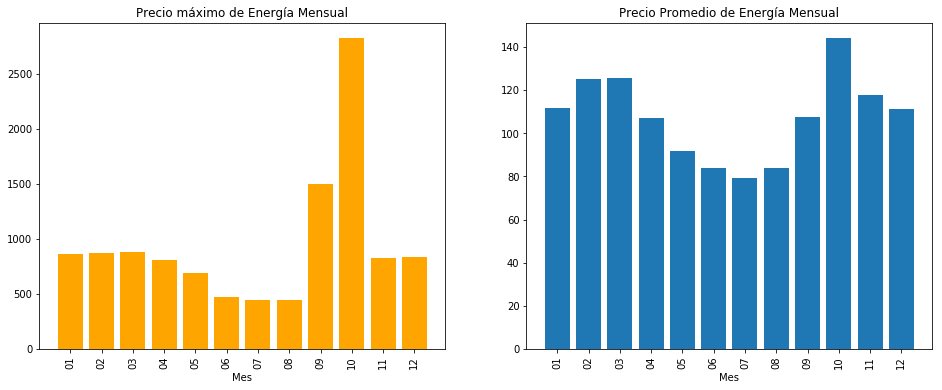

In [17]:
dfmesprom = dfunique.copy()
dfmesprom['Fecha'] = pd.to_datetime(dfmesprom['Fecha']) #Convierte en Fecha
dfmesprom['Mes'] =  dfmesprom[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%m'), axis=1)#Extrae el mes
dfmesprom = dfmesprom.groupby('Mes').agg({'Precio': np.mean}) #Agrega el mes promedio

plt.figure(figsize=(16, 6))
plt.subplot(1, 2 , 1)
plt.bar(range(12), dfmes['Precio'], color ='orange')
plt.xticks(range(12), (list(dfmes.index)), rotation='vertical')
plt.title('Precio máximo de Energía Mensual')
plt.xlabel('Mes')
plt.subplot(1, 2 , 2)
plt.bar(range(12), dfmesprom['Precio'])
plt.xticks(range(12), (list(dfmesprom.index)), rotation='vertical')
plt.title('Precio Promedio de Energía Mensual')
plt.xlabel('Mes')

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

Text(0, 0.5, 'Numero de ocurrencias')

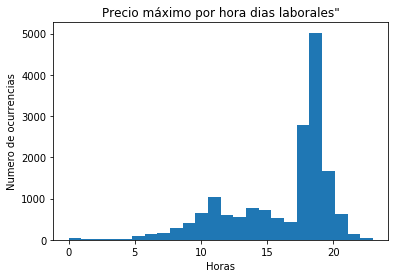

In [18]:
dfdialab = dfunique.copy()
dfdialab['Fecha'] = pd.to_datetime(dfdialab['Fecha'])
dfdialab['Dia'] =  dfdialab[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
listdiahabil = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
dfdialaboral = dfdialab[(dfdialab['Dia'] == 'Monday') | (dfdialab['Dia'] == 'Tuesday')| (dfdialab['Dia'] == 'Wednesday')| (dfdialab['Dia'] == 'Thursday')| (dfdialab['Dia'] == 'Friday')]
dfgroupfecha = dfdialaboral.groupby('Fecha').agg({'Precio': np.max}) 
dfgroupfecha.reset_index(inplace=True)
joindf = pd.merge(dfdialaboral, dfgroupfecha, on=['Fecha','Precio'], how='inner')

dfhoras = list(map(int,joindf['Hora'].tolist()))
plt.hist(dfhoras, bins=24)
plt.title('Precio máximo por hora dias laborales"')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

Text(0, 0.5, 'Numero de ocurrencias')

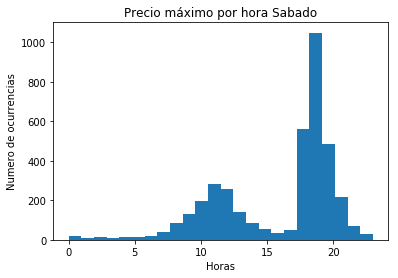

In [19]:
dfdiasab = dfunique.copy()
dfdiasab['Fecha'] = pd.to_datetime(dfdiasab['Fecha'])
dfdiasab['Dia'] =  dfdiasab[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
dfdiasabado = dfdiasab[(dfdiasab['Dia'] == 'Saturday')]
dfgroupsab = dfdiasabado.groupby('Fecha').agg({'Precio': np.max}) 
dfgroupsab.reset_index(inplace=True)
joindfsab = pd.merge(dfdiasabado, dfgroupsab, on=['Fecha','Precio'], how='inner')

dfhorassab = list(map(int,joindfsab['Hora'].tolist()))
plt.hist(dfhorassab, bins=24)
plt.title('Precio máximo por hora Sabado')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

Text(0, 0.5, 'Numero de ocurrencias')

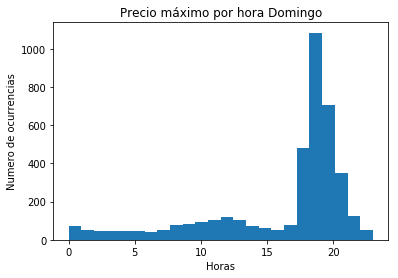

In [20]:
dfdiadom = dfunique.copy()
dfdiadom['Fecha'] = pd.to_datetime(dfdiadom['Fecha'])
dfdiadom['Dia'] =  dfdiadom[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
dfdiadomingo = dfdiadom[(dfdiadom['Dia'] == 'Sunday')]
dfgroupdom = dfdiadomingo.groupby('Fecha').agg({'Precio': np.max}) 
dfgroupdom.reset_index(inplace=True)
joindfdom = pd.merge(dfdiadomingo, dfgroupdom, on=['Fecha','Precio'], how='inner')

dfhorasdom = list(map(int,joindfdom['Hora'].tolist()))
plt.hist(dfhorasdom, bins=24)
plt.title('Precio máximo por hora Domingo')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [21]:
dfdiamin = dfunique.copy()
dfdiamin['Fecha'] = pd.to_datetime(dfdiamin['Fecha'])
dfdiamin['Year'] =  dfdiamin[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%Y'), axis=1)
dfgroupminfecha = dfdiamin.groupby('Year').agg({'Precio': np.min}) 
dfgroupminfecha.reset_index(inplace=True)
dfgroupminfecha.columns = ["Year","MinPrecio"]
joindfmin = pd.merge(dfgroupminfecha, dfdiamin, on = ['Year'], how ='inner')
joindfmin = joindfmin[(joindfmin['MinPrecio'] == joindfmin['Precio'])]
print(joindfmin[['Fecha','MinPrecio']].drop_duplicates())

            Fecha  MinPrecio
7      1995-07-28   0.000000
10     1995-07-31   0.000000
11     1995-08-01   0.000000
84     1995-10-13   0.000000
338    1995-07-29   0.000000
339    1995-07-30   0.000000
3800   1995-07-26   0.000000
4140   1996-06-30   0.000000
4149   1996-07-09   0.000000
4152   1996-07-12   0.000000
4162   1996-07-22   0.000000
4163   1996-07-23   0.000000
4164   1996-07-24   0.000000
4876   1996-07-04   0.000000
5981   1996-07-11   0.000000
7749   1996-05-10   0.000000
9651   1996-07-21   0.000000
12566  1996-07-08   0.000000
13668  1997-07-15  10.882310
21695  1998-07-12  13.847330
21696  1998-07-13  13.847330
21697  1998-07-14  13.847330
21698  1998-07-15  13.847330
21699  1998-07-16  13.847330
21701  1998-07-18  13.847330
21702  1998-07-19  13.847330
21703  1998-07-20  13.847330
21704  1998-07-21  13.847330
21705  1998-07-22  13.847330
21706  1998-07-23  13.847330
...           ...        ...
32539  1999-03-28  18.359530
37652  1999-03-31  18.359530
41303  2000-03

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 1440x1440 with 0 Axes>

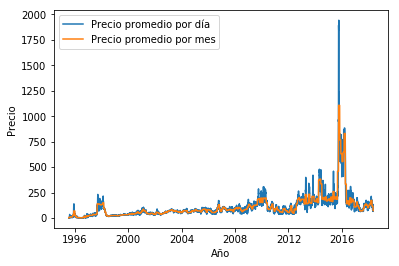

In [22]:
dfmesmean = dfunique.copy()
dfmesmean['Fecha'] = pd.to_datetime(dfmesmean['Fecha'])
dfmesmean['Mes'] =  dfmesmean[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%m'), axis=1)
dfmesmean['Anio'] =  dfmesmean[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%Y'), axis=1)
dfaniomes = dfmesmean.groupby(['Mes','Anio']).agg({'Precio': np.mean}) 
dfaniomes.reset_index(inplace=True)
dfaniomes.columns = ['Mes','Anio','Promedio-Mes']

joinmesmean = pd.merge(dfaniomes, dfmesmean, on = ['Mes','Anio'], how ='inner')

dfdiamean = dfunique.copy()
dfdiamean = dfdiamean.groupby('Fecha').agg({'Precio': np.mean}) 
dfdiamean.reset_index(inplace=True)
dfdiamean.columns = ['Fecha','Promedio-Dia']

joinmesdia = pd.merge(dfaniomes, dfmesmean, on = ['Mes','Anio'], how ='inner')
joinmesdia = pd.merge(joinmesdia, dfdiamean, on = ['Fecha'], how ='inner')
dfgraph = joinmesdia.groupby('Fecha').agg({'Promedio-Dia': np.mean,'Promedio-Mes': np.mean}) 

plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
ax.plot((dfgraph.index.tolist()), dfgraph['Promedio-Dia'], label="Precio promedio por día")
ax.plot((dfgraph.index.tolist()), dfgraph['Promedio-Mes'], label="Precio promedio por mes")
plt.xlabel("Año")
plt.ylabel("Precio")

ax.legend()

---